# Second Assignment

This assignment comprises two parts for the remaining **85 points**.

Part A will be worth 35 points.

Part B will be worth 50 points.

**Deadline:** To be confirmed by the tutor - please see the date on our Canvas page.

**Submission:** Please email your solutions and your completed Declaration of Authorship (DoA) form to weeklyclasses@conted.ox.ac.uk



# Part A (35 points)

* Iris - Train-test splitting (3 points)
* Iris - Feature Scaling (4 points)
* Supervised learning via KNN - model creation (6 points) and training (2 points)
* KNN - Evaluation on train set (5 points) and test set (5 points)
* Unsupervised Learning using K-Means (10 points)


## Setup

In [1]:
# Python ≥3.8 is required
import sys
assert sys.version_info >= (3, 8)

# Scikit-Learn ≥ 1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

### Import data and training test split

Let's import the iris dataset first.

In [2]:
from sklearn.datasets import load_iris # Load the iris dataset from repository of sklearn datasets
iris = load_iris()

In [3]:
# Check DESCR
print(iris.DESCR) # Check the description of the dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
iris.keys() # Check the keys of the dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# check the target names
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
# check the feature names
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# check shape of the dataset
print(iris.data.shape) # shape of the data

(150, 4)


In [8]:
# check sample data
print(iris.data[:5]) # first 5 samples of the dataset

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### Train-test splitting (3 points)

As a first step let's split the dataset into training (2/3 of the data) and test set (1/3 of the data)

In [9]:
X = iris.data # contains the features of the sepal and petal lengths and widths
y = iris.target # contains the target labels (0, 1, 2) for the three species of iris flowers
# For reference, the target labels correspond to:
# 0: setosa
# 1: versicolor
# 2: virginica
# check the target names
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [10]:
feature_names = iris.feature_names # contains the names of the four features (sepal length, sepal width, petal length, petal width)
target_names = iris.target_names # contains the names of the three species of iris flowers (setosa, versicolor, virginica)

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y
iris_df['species'] = iris_df['target'].apply(lambda x: target_names[x])

print("Iris Dataset Shape:", X.shape)


Iris Dataset Shape: (150, 4)


In [11]:
print("First 5 rows of the dataset:")
print(iris_df.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0              5.100             3.500              1.400             0.200   
1              4.900             3.000              1.400             0.200   
2              4.700             3.200              1.300             0.200   
3              4.600             3.100              1.500             0.200   
4              5.000             3.600              1.400             0.200   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


### We need to remember the following variables contain and are arrays/matrices:

- X = iris.data # contains the data of features of the sepal and petal lengths and widths (['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
- y = iris.target # contains the target labels (0, 1, 2) for the three species of iris flowers


In [12]:
'''
I've split the dataset into training (70%) and testing (30%) sets using train_test_split with a random state of 42 for reproducibility.
This allows us to later evaluate how well our model generalizes to unseen data.
Train_test_split gives as output four arrays: X_train, X_test, y_train, and y_test.
- X_train = training data features [70% of the data measure of the Iris dataset will be used for training]
- X_test = testing data features [30% of the data measure of the Iris dataset will be used for testing performance as unseen data]
- y_train = training data labels [The rows in the train set that contain the class labels ]
- y_test = testing data labels
# The training set is used to train the model, while the testing set is used to evaluate its performance.
'''
# Split the dataset into 70% training and 30% testing
from sklearn.model_selection import train_test_split # Used to split the data in an array object into a training set and a testing set for future evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # This split is fundamental for evaluating the performance of our model training capacity and generalization on unseen data by assigning 70% of the data
# to the training set and 30% to the testing set.
# We could have used also train_size=0.7 as an alternative to test_size=0.3
# Random_state is used to create random numbers for the split, 42 is just a random seed can actully be any int number
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (105, 4)
Testing set shape: (45, 4)


Therefore we have divided the complete dataset into 2 sets 70/30 relationship
- **Training Set** : (X_train,y_train)
- **Test Set** : (X_test, y_test)

In [13]:
'''
So for example here we have 5 rows (measures), 4 columns (features) and 3 classes(target labels) in the target labels with 5 labelled entries
'''
print("\nFirst 5 samples of the training set:")
print(X_train[:5]) # check the first 5 samples of the training set

# check the first 5 labels of the training set
print("\nFirst 5 labels of the training set:")
print(y_train[:5]) # check the first 5 labels of the training set


First 5 samples of the training set:
[[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]]

First 5 labels of the training set:
[1 2 2 1 2]


In [14]:
# Verify the percentage of the testing and training sets
train_percentage = (X_train.shape[0] / X.shape[0]) * 100
test_percentage = (X_test.shape[0] / X.shape[0]) * 100
print(f"\nTraining set percentage: {train_percentage:.2f}%")
print(f"Testing set percentage: {test_percentage:.2f}%")


Training set percentage: 70.00%
Testing set percentage: 30.00%


### Feature scaling (4 points)

Then let's perform feature scaling (up to you whether you want to use standardisation or normalisation)

In [15]:
'''
The code uses StandardScaler to standardize the features by removing the mean and scaling to unit variance.
This step is crucial for distance-based algorithms like KNN.
The scaled features have a mean of approximately 0 and a standard deviation of 1, which ensures all features contribute equally to the distance calculations.
Standard scaling is essential for algorithms that rely on distance metrics, such as K-Nearest Neighbors (KNN) because it ensures that all features have the same scale relative to each other:
- Features with larger ranges can disproportionately influence the distance calculations. For example, if one feature has a range of 0 to 100cm and another has a range of 0 to 1cm, the first feature will dominate the distance calculations.
'''
from sklearn.preprocessing import StandardScaler # StandardScaler a class from the preprocessing module of the sklearn library is used to standardize features by removing the mean and scaling to unit variance
# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train) # Fit the scaler to the training data and transform it
'''
With fit, we mean adjusting?? measure data for each value minus the median and divided by the standard deviation.
We need to do scaling to ensure that all features contribute equally to the distance calculations (especially important for distance-based algorithms like KNN), which is why we use StandardScaler.
For example, if one feature has a much larger range than another, it could dominate the distance calculations and lead to biased results.
The fit_transform method first computes the mean and standard deviation of the training data, then scales the training data using these parameters:
- X_scaled = (original row value - media) / stdev
This ensures that the training data is standardized to have a mean of 0 and a standard deviation of 1.
The transform method is then applied to the test data, which uses the same mean and standard deviation computed from the training data to scale the test data.
This is important because we want to ensure that the test data is scaled in the same way as the training data, so that the model can make accurate predictions on unseen data.

'''
X_test_scaled = scaler.transform(X_test) # Same transformation is applied to the test data, but without fitting the scaler again. This ensures that the test data is scaled using the same parameters (mean and standard deviation) as the training data.

# Compare original and scaled features
print("\nBefore scaling (first 3 training samples):")
print(X_train[:3])
print("\nAfter scaling (first 3 training samples):")
print(X_train_scaled[:3])

# Check mean and standard deviation of scaled features
print("\nMean of scaled features:", np.mean(X_train_scaled, axis=0))
print("Standard deviation of scaled features:", np.std(X_train_scaled, axis=0))



Before scaling (first 3 training samples):
[[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]]

After scaling (first 3 training samples):
[[-0.41 -1.46 -0.1  -0.32]
 [ 0.55 -0.5   0.72  0.35]
 [ 0.67  0.22  0.95  0.76]]

Mean of scaled features: [ 2.57e-15 -9.89e-16 -2.92e-16  1.21e-16]
Standard deviation of scaled features: [1. 1. 1. 1.]


**Note**: Note that the result are given in scientify notation ofr the mean scaled features and are close to 0 since they have negative exppnential. Also note, that to verify Standarization is correct the Standard Deviation should be = 1

In [16]:
print("Mean of scaled features (rounded):", np.round(np.mean(X_train_scaled, axis=0), 10)) # round the mean of scaled features to 10 decimal places to verify that it is approximately 0

Mean of scaled features (rounded): [ 0. -0. -0.  0.]


## Supervised training using K-Nearest Neighbours

### Model creation (6 points) and training (2 points)

Now, evaluate the performance of your classifier using the confusion matrix. Compute and visualize the confusion matrix for our three classes

Now, let's create and train a `KNeighborsClassifier`.

We want the following properties for our classifier:
* check 7 neighbours by default for the `kneighbors` queries.
* use the Manhattan distance metric to identify neighbours
* use the Ball Tree algortihm to compute the nearest neighbours, with a `leaf_size` of 3. Check the Ball Tree algorithm documentation on scikit-learn for more details.

Check the `KNeighborsClassifier` documentation to identify the arguments to pass to the `KNeighborsClassifier` constructor.

In [17]:
'''
The KNeighborsClassifier is a class from the neighbors module of the sklearn library that implements the K-Nearest Neighbors algorithm for classification tasks.
I've created a K-Nearest Neighbors classifier with k=7 and trained it on the scaled training data.
The model learns the patterns in the data by storing the feature vectors and corresponding class labels.
'''
from sklearn.neighbors import KNeighborsClassifier
# Create the KNN classifier with k=7 as the number of closest neighbors
knn = KNeighborsClassifier(n_neighbors=7, # Number of neighbors to consider when making predictions and deciding the class label for a new data point.
                           metric='manhattan',   # The distance metric used to calculate the distance between data points. In this case, we are using the Manhattan distance (L1 norm), which is the sum of the absolute differences between the coordinates of two points.
                           algorithm='ball_tree',   # algortithm which divides the data into a tree structure to speed up the search for nearest neighbors in high-dimensional spaces with a ball shape nested in each other.
                           leaf_size=3) # The leaf size parameter controls the number of samples in each leaf node of the tree. A smaller leaf size can lead to more accurate results but may increase computation time.

# Train the model using the scaled training data
# The model learns the patterns in the data during training by storing the feature vectors and corresponding class labels so that it can make predictions on new data.
knn.fit(X_train_scaled, y_train)
print("\nKNN model created and trained successfully")


KNN model created and trained successfully


### Evaluation on the training set (5 points)

Now, evaluate the performance of your classifier using the confusion matrix. Compute and visualize the confusion matrix for our three classes

The code evaluates the KNN model on both training and test sets, providing:

- Accuracy scores
- Confusion matrices
- Classification reports with precision, recall, and F1-score for each class

This helps identify if the model is overfitting (high training accuracy but low test accuracy) or generalizing well.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Commonly used metrics for evaluating classification models
# Predictions on the training set
y_train_pred = knn.predict(X_train_scaled)

# Evaluate on training set comparing the predicted labels with the true labels
print("\nTraining Set Predictions:")
print("Predicted labels:", y_train_pred)
print("True labels:", y_train)


Training Set Predictions:
Predicted labels: [1 1 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 1 2 1 1 2 1 0 1 2 0
 0 1 2 0 2 0 0 2 1 2 2 2 2 1 0 0 1 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1
 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 1 0 1 2]
True labels: [1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0
 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1
 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]


In [19]:
# Calculate accuracy score
print("\nTraining Set Accuracy:")
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nTraining Set Evaluation:")
print("Accuracy:", train_accuracy)


Training Set Accuracy:

Training Set Evaluation:
Accuracy: 0.9333333333333333


In [20]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))


Confusion Matrix:
[[31  0  0]
 [ 0 34  3]
 [ 0  4 33]]


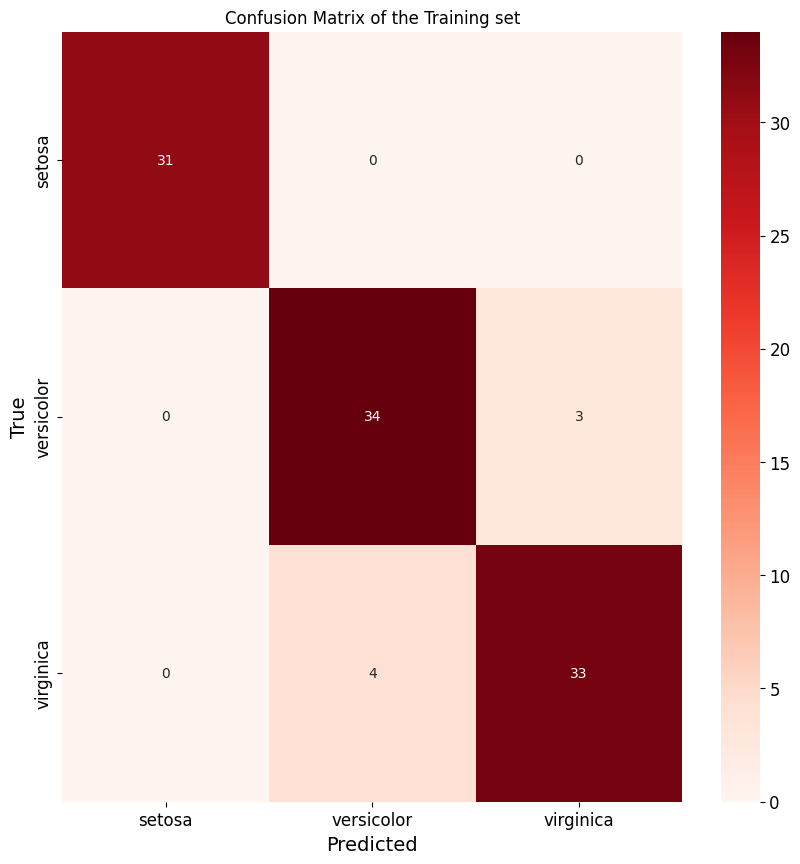

"'\nThe diagonal elements of the confusion matrix represent the number of correct predictions for each class (TP), while the off-diagonal elements represent misclassifications.\nThe confusion matrix provides a detailed breakdown of the model's performance, showing how many instances of each class were correctly classified and how many were misclassified as other classes.\n"

In [21]:
# visualize the confusion matrix
import seaborn as sns
plt.figure(figsize=(10, 10))
Conf_Mat = confusion_matrix(y_train, y_train_pred)
sns.heatmap(Conf_Mat, annot=True, fmt='d', cmap='Reds', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of the Training set')
plt.show()

''''
The diagonal elements of the confusion matrix represent the number of correct predictions for each class (TP), while the off-diagonal elements represent misclassifications.
The confusion matrix provides a detailed breakdown of the model's performance, showing how many instances of each class were correctly classified and how many were misclassified as other classes.
'''

Compute precision, recall, and F1 score for each class prediction on the training set and print out a report.

In [22]:
# Report the classification metrics
print("\nClassification Report on Training set:")
print(classification_report(y_train, y_train_pred, target_names=target_names)) # Compare the predicted labels with the true labels of the training set


Classification Report on Training set:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        31
  versicolor       0.89      0.92      0.91        37
   virginica       0.92      0.89      0.90        37

    accuracy                           0.93       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.93      0.93      0.93       105



**NOTE** = support indicates how many examples instances we have in each class in the training dataset

How does the result look like? Has anything been misclassified?
Yes, it seems around 7-8 values where missclasified after comparing with true label set in the trainining set the classifier.

### Evaluation on the test set (5 points)

Now make predictions on the test set, compute the confusion matrix for the test set. how does it compare to the one of the training set?

In [23]:
# To detect overfitting we can compare the training accuracy with the testing accuracy, if the training accuracy is significantly higher than the testing accuracy, it may indicate overfitting.
# Predictions on test set
y_test_pred = knn.predict(X_test_scaled)

# Evaluate on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Set Evaluation:")
print("Accuracy:", test_accuracy)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))



Test Set Evaluation:
Accuracy: 1.0

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


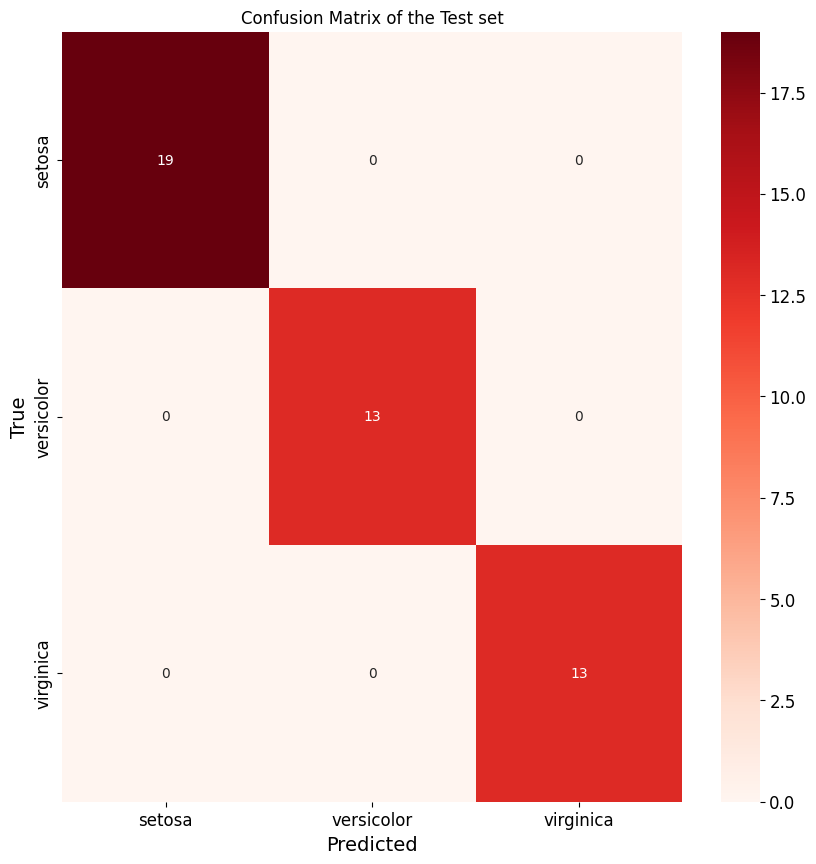

In [24]:
# visualize the confusion matrix for the test set evaluation
import seaborn as sns
plt.figure(figsize=(10, 10))
Conf_Mat_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(Conf_Mat_test, annot=True, fmt='d', cmap='Reds', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of the Test set')
plt.show()


Compute precision, recall, and F1 score for each class prediction on the test set and print out a report.

In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Unsupervised Learning using K-Means (10 points)

Train K-means clusterers on the entire iris dataset.

Train clusters with 2 to 6 clusters and use one of the metrics discussed in week 7 to show which is the optimal number of clusters

In [26]:
'''
I've implemented K-Means clustering with 3 clusters (corresponding to the 3 Iris species). The implementation:

Fits the clustering model to the scaled features
Evaluates clustering performance using the Adjusted Rand Index and Silhouette Score
Visualizes the clusters vs. actual species distribution
Creates a cross-tabulation to compare how well the clusters match the actual species

The code includes visualizations to help understand how well the unsupervised algorithm discovered the natural groupings in the data without using the class labels.
'''

from sklearn.cluster import KMeans # KMeans is a clustering algorithm that partitions the data into k clusters based on feature similarity
# K Means, in contrast to KNN, is an unsupervised learning algorithm that does not require labeled data. It groups the data into k clusters based on feature similarity
# Since we're working with Iris dataset, we know there are 3 clusters (species)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init is the number of times the algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
# Fit the KMeans model to the scaled features
# The fit method computes the KMeans clustering on the scaled features
kmeans.fit(X_scaled := scaler.fit_transform(X))

# Get cluster labels
cluster_labels = kmeans.labels_ # The labels_ attribute contains the cluster labels for each data point in the dataset

# Evaluate K-means clustering by comparing with actual species
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Calculate ARI (Adjusted Rand Index) to compare clustering with actual classes
ari = adjusted_rand_score(y, cluster_labels) # The adjusted Rand index is a measure of the similarity between two data clusterings. It ranges from -1 to 1, where 1 means the clusterings are identical, and 0 means they are random.
# The ARI is adjusted for chance, meaning it accounts for the possibility of random clustering
print("\nK-Means Clustering Evaluation:")
print("Adjusted Rand Index:", ari)

# Calculate Silhouette Score to evaluate clustering quality
silhouette = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette) # The silhouette score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher value indicates better-defined clusters.

# Visualize the clusters (using 2 features for simplicity)
plt.figure(figsize=(12, 5))


K-Means Clustering Evaluation:
Adjusted Rand Index: 0.6201351808870379
Silhouette Score: 0.45994823920518635


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

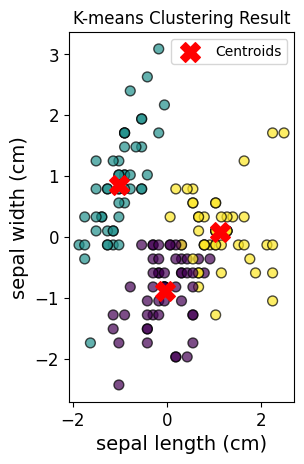

In [27]:
# Plot 1: K-means clustering result
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis',
            edgecolor='k', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering Result')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()

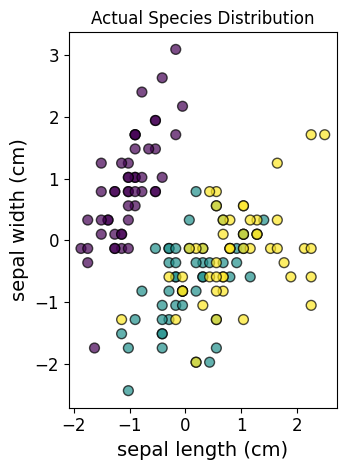

In [28]:
# Plot 2: Actual species distribution
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis',
            edgecolor='k', s=50, alpha=0.7)
plt.title('Actual Species Distribution')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.tight_layout()
plt.show()

In [29]:
# Show a comparison table of K-means clusters vs actual species
comparison_df = pd.DataFrame({
    'Actual Species': [target_names[i] for i in y],
    'K-means Cluster': cluster_labels
})
print("\nComparison of K-means clusters with actual species (first 10 samples):")
print(comparison_df.head(10))

# Create a cross-tabulation to see how well K-means clustered the data
cross_tab = pd.crosstab(y, cluster_labels,
                         rownames=['Actual Species'],
                         colnames=['K-means Cluster'])
print("\nCross-tabulation of actual species vs K-means clusters:")
print(cross_tab)


Comparison of K-means clusters with actual species (first 10 samples):
  Actual Species  K-means Cluster
0         setosa                1
1         setosa                1
2         setosa                1
3         setosa                1
4         setosa                1
5         setosa                1
6         setosa                1
7         setosa                1
8         setosa                1
9         setosa                1

Cross-tabulation of actual species vs K-means clusters:
K-means Cluster   0   1   2
Actual Species             
0                 0  50   0
1                39   0  11
2                14   0  36


Congratulations, you have completed Part A of this second assignment. Now move on to Part B below.

# Part B (50 marks)

For Part B, you will need to identify a suitable dataset (of your choice) and implement a machine learning pipeline, comprising the following steps:

* Presentation of the problem (6 points)
* data exploration (4 points)
* data preparation (10 points)
* model selection: try 2 models (max 3) (20 points)
* evaluation on test set (3 points)
* conclusion commenting on the results and comparing the models (7 points)

Some possible datasets:
* [Titanic dataset](https://www.kaggle.com/c/titanic): binary classification
* [Wine dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset): multi-class classification/regression
* [Abalone dataset](https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset): regression
* [California housing price](https://www.kaggle.com/datasets/camnugent/california-housing-prices): regression
* [CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html): multi-class classification in images

Look for more on [Kaggle](https://www.kaggle.com/datasets) or elsewhere.

# Multi-class classification of Books
Dataset: TagMyBook https://www.kaggle.com/datasets/athu1105/tagmybook?resource=download

# 1. Presentation of the Problem

 We have a dataset "LibraryBooks.csv" with ~1540 labeled values.

 The task is to classify books into 10 genres (0 to 9) using the "title" and "synopsis" columns.

 The mapping of genres is as follows:

 fantasy: 0,

 history: 1,
 horror: 2,
 psychology: 3, romance: 4, science: 5,
 science_fiction: 6, sports: 7, thriller: 8, travel: 9.


# 2. Data Exploration

In [30]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("LibraryBooks.csv")

# Map the genre names to numeric labels
genre_mapping = {
    'fantasy': 0,
    'history': 1,
    'horror': 2,
    'psychology': 3,
    'romance': 4,
    'science': 5,
    'science_fiction': 6,
    'sports': 7,
    'thriller': 8,
    'travel': 9
}
df['genre_label'] = df['genre'].map(genre_mapping)

# Display first few rows and basic info
print("Dataset preview:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nGenre distribution (numeric labels):")
print(df['genre'].value_counts())

Dataset preview:
   Unnamed: 0                                              title  rating  \
0           0              Sapiens: A Brief History of Humankind   4.390   
1           1  Guns, Germs, and Steel: The Fates of Human Soc...   4.040   
2           2            A People's History of the United States   4.070   
3           3  The Devil in the White City: Murder, Magic, an...   3.990   
4           4                          The Diary of a Young Girl   4.180   

                name num_ratings num_reviews num_followers  \
0  Yuval Noah Harari    8,06,229      46,149         30.5k   
1      Jared Diamond    3,67,056      12,879         6,538   
2        Howard Zinn    2,24,620       6,509         2,354   
3        Erik Larson    6,13,157      36,644         64.2k   
4         Anne Frank   33,13,033      35,591         4,621   

                                            synopsis    genre  genre_label  
0  100,000 years ago, at least six human species ...  history            1  

# 3. Data Preparation

In [31]:
# For simplicity, we combine the 'title' and 'synopsis' columns into a single text field.
df['text'] = df['title'].fillna('') + " " + df['synopsis'].fillna('')

# We remove any duplicates or missing genre labels if needed.
df = df.dropna(subset=['genre'])

# Split the data into training and testing sets (70/30 split)
from sklearn.model_selection import train_test_split
X = df['text']
y = df['genre_label']  # we use the new numeric label column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Train set: 1077 samples
Test set: 462 samples


# 4. Model Selection

## 4.1 Neural Network Classifier using TF-IDF and MLPClassifier

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

print("\nTraining Neural Network Classifier...")

nn_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('mlp', MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42))
])

nn_pipeline.fit(X_train, y_train)
nn_predictions = nn_pipeline.predict(X_test)

print("\nFinished training Neural Network Classifier!")


Training Neural Network Classifier...

Finished training Neural Network Classifier!


## 4.2 BERT Cosine Similarity Model and MiniLM encoder

In [33]:
# We use SentenceTransformer to get embeddings for the texts.
from sentence_transformers import SentenceTransformer, util

print("\nLoading BERT model for embeddings...")
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Create embeddings for the training data
train_embeddings = bert_model.encode(X_train.tolist(), convert_to_tensor=True)

# Compute prototype (mean) embeddings per genre using the training set.
genre_prototypes = {}
for genre in sorted(y_train.unique()):
    indices = y_train[y_train == genre].index
    genre_embeds = bert_model.encode(X_train.loc[indices].tolist(), convert_to_tensor=True)
    genre_prototypes[genre] = genre_embeds.mean(dim=0)

# Predict using cosine similarity on the test set.
bert_predictions = []
test_embeddings = bert_model.encode(X_test.tolist(), convert_to_tensor=True)
for test_embed in test_embeddings:
    sims = {genre: util.cos_sim(test_embed, proto).item() for genre, proto in genre_prototypes.items()}
    pred_genre = max(sims, key=sims.get)
    bert_predictions.append(pred_genre)


Loading BERT model for embeddings...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## 4.3 FLAN T5 Pre-trained Tokenizer Transformer

In [34]:
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch

# Load and prepare dataset
df = pd.read_csv("LibraryBooks.csv")

# Genre mapping
genre_mapping = {
    'fantasy': 0, 'history': 1, 'horror': 2, 'psychology': 3, 'romance': 4,
    'science': 5, 'science_fiction': 6, 'sports': 7, 'thriller': 8, 'travel': 9
}
reverse_mapping = {v: k for k, v in genre_mapping.items()}
genre_list = list(genre_mapping.keys())
label_set = set(genre_list)

# Add genre label
df['genre_label'] = df['genre'].map(genre_mapping)

# Load model + tokenizer and move to GPU if available
# Note: Use Google Colab Notebook with T4 GPU, otherwise very slow.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large").to(device)

# Prepare prompts
df['flan_prompt'] = df.apply(
    lambda row: f"Classify the following title and synopsis into one of the genres: {', '.join(genre_list)}.\n\n"
                f"Title: {row['title']}\nSynopsis: {row['synopsis']}", axis=1
)

# Batch inference
batch_size = 20
predictions = []

print("Classifiying predictions in batches...")
for i in tqdm(range(0, len(df), batch_size)):
    batch_prompts = df['flan_prompt'].iloc[i:i + batch_size].tolist()

    # Tokenize batch
    inputs = tokenizer(batch_prompts, return_tensors="pt", padding=True, truncation=True).to(device)

    # Outputs
    outputs = model.generate(**inputs, max_new_tokens=10)

    # Decode
    batch_preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    batch_preds = [pred.lower().strip() if pred.lower().strip() in label_set else "unknown" for pred in batch_preds]

    predictions.extend(batch_preds)

# Add predictions back to DataFrame
df['flan_predicted_genre'] = predictions

# Filter valid predictions
valid_df = df[df['flan_predicted_genre'].isin(genre_list)]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Generating predictions in batches using GPU...


100%|██████████| 77/77 [03:43<00:00,  2.90s/it]


# 5. Evaluation on Test Set

In [36]:
from sklearn.metrics import accuracy_score

nn_accuracy = accuracy_score(y_test, nn_predictions)
bert_accuracy = accuracy_score(y_test, bert_predictions)
# Accuracy
flan_acc = accuracy_score(valid_df['genre'], valid_df['flan_predicted_genre'])
print(f"\nFLAN-T5 Accuracy on rows: {flan_acc:.2f} ({len(valid_df)} valid predictions)")

print("\nEvaluation Results:")
print(f"Neural Network Classifier Accuracy: {nn_accuracy:.2f}")
print(f"BERT Cosine Similarity Classifier Accuracy: {bert_accuracy:.2f}")
print(f"FLAN-T5 Accuracy: {flan_acc:.2f}")


FLAN-T5 Accuracy on rows: 0.71 (1539 valid predictions)

Evaluation Results:
Neural Network Classifier Accuracy: 0.68
BERT Cosine Similarity Classifier Accuracy: 0.73
FLAN-T5 Accuracy: 0.71


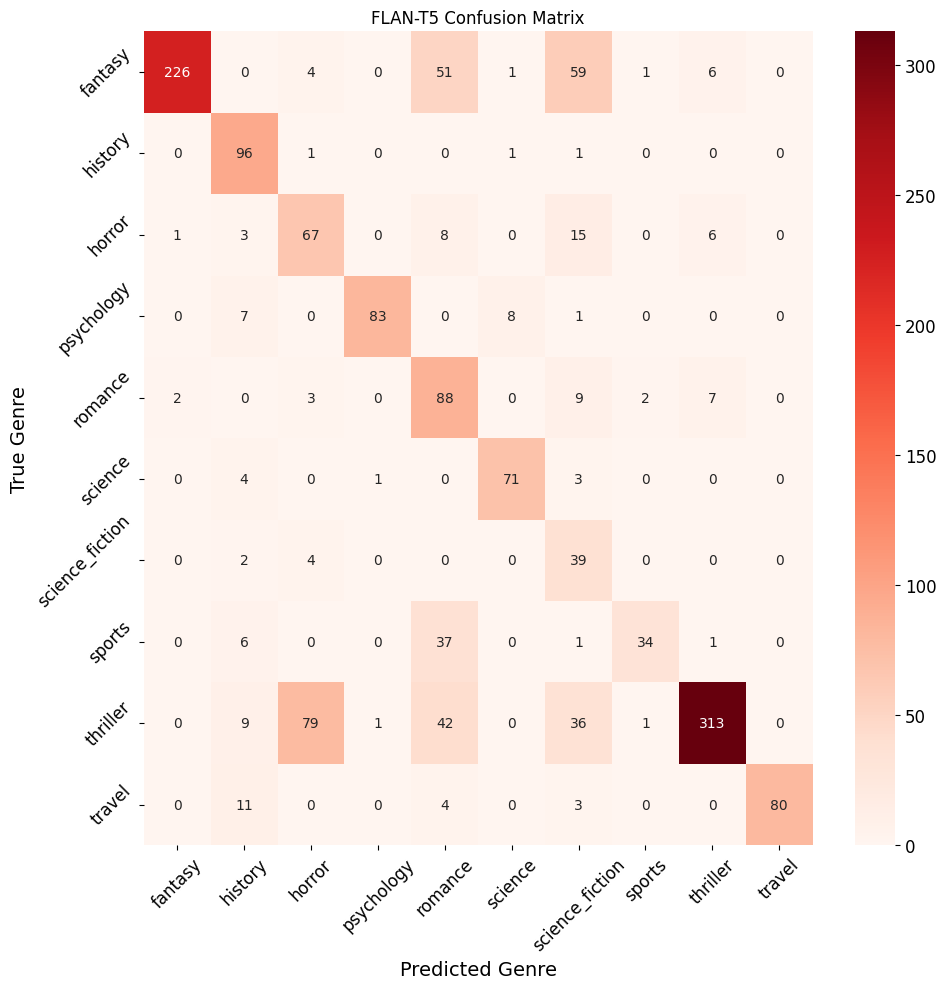

In [37]:
# Plot confusion matrix for FLAN
cm = confusion_matrix(valid_df['genre'], valid_df['flan_predicted_genre'], labels=genre_list)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=genre_list, yticklabels=genre_list)
plt.title("FLAN-T5 Confusion Matrix")
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
print(df['genre'].value_counts())

print(valid_df['flan_predicted_genre'].value_counts())

genre
thriller           481
fantasy            348
romance            111
horror             100
history             99
psychology          99
travel              98
science             79
sports              79
science_fiction     45
Name: count, dtype: int64
flan_predicted_genre
thriller           333
romance            230
fantasy            229
science_fiction    167
horror             158
history            138
psychology          85
science             81
travel              80
sports              38
Name: count, dtype: int64


# 6. Conclusion and Comparison

As we can see from the evaluation results, we have evolved in accuracy and deeper understanding by capturing first Keywords, then comparison of similarity embeddings and finally grasping more contextual meaning with FLAN pre-trained model applying not only on training set, but in all the dataset complete, the downsied is that it can only be used with at least a T4 GPU, in this exercise we used Google Colab Notebook GPU T4, this allowed deeper and booster our understanding and classificaiton accuracy.

# Appendix: T5 Tokenizer Classifier testing on one title and synopsis

In [38]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large")

# Genre labels
labels = [
    "fantasy", "history", "horror", "psychology", "romance",
    "science", "science_fiction", "sports", "thriller", "travel"
]

# Sample title and synopsis
title = "Sapiens: A Brief History of Humankind"
synopsis = (
'''
100,000 years ago, at least six human species inhabited the earth. Today there is just one. Us. Homo sapiens.

How did our species succeed in the battle for dominance? Why did our foraging ancestors come together to create cities and kingdoms? How did we come to believe in gods, nations and human rights; to trust money, books and laws; and to be enslaved by bureaucracy, timetables and consumerism? And what will our world be like in the millennia to come?

In Sapiens, Dr Yuval Noah Harari spans the whole of human history, from the very first humans to walk the earth to the radical – and sometimes devastating – breakthroughs of the Cognitive, Agricultural and Scientific Revolutions. Drawing on insights from biology, anthropology, paleontology and economics, he explores how the currents of history have shaped our human societies, the animals and plants around us, and even our personalities. Have we become happier as history has unfolded? Can we ever free our behaviour from the heritage of our ancestors? And what, if anything, can we do to influence the course of the centuries to come?

Bold, wide-ranging and provocative, Sapiens challenges everything we thought we knew about being human: our thoughts, our actions, our power ... and our future.
'''
)

# Build prompt
input_text = f"Classify the following title and synopsis into one of the genres: {', '.join(labels)}.\n\n" \
             f"Title: {title}\nSynopsis: {synopsis}"

# Tokenize and generate
input_ids = tokenizer(input_text, return_tensors="pt").input_ids
outputs = model.generate(input_ids, max_new_tokens=10)

# Decode and print the result
prediction = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Predicted Genre:", prediction)
print("True Genre:", "History")


Predicted Genre: history
True Genre: History
